# Project 1: salary bonus
<br>
Use the SHAP analysis to answer the following questions:
<ol>
<li> Which features does NOT have a significant relationship with bonus?
<li> What tends to happens to an employee's bonus as they gain more experience? 
<li> Are there any potential interactions in the dataset? 
</ol>
<br>
<b>Dataset:</b> https://www.kaggle.com/conorsully1/interaction-dataset

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

import shap
shap.initjs()

path = "/Users/conorosully/Google Drive/My Drive/Medium/SHAP Interactions/Figures/{}"

/Users/conorosully/miniconda3/envs/SHAP/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset

In [2]:
#import dataset
data = pd.read_csv("../data/interaction_dataset.csv",sep='\t')

y = data['bonus']
X = data.drop('bonus', axis=1)

print(len(data))
data.head()

1000


,experience,degree,performance,sales,days_late,bonus
0,31,1,6.11,29,14,197
1,35,1,9.55,44,8,314
2,9,1,2.64,26,20,88
3,40,1,0.22,13,7,233
4,18,1,6.46,11,13,108


## Modelling

In [3]:
#Train model
model = RandomForestRegressor(n_estimators=100) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

Text(0.5, 0, 'Actual')

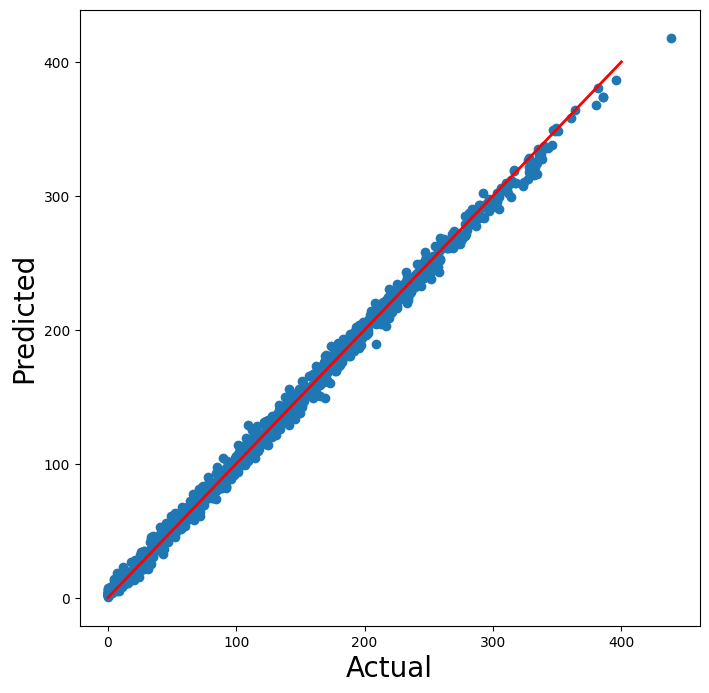

In [4]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 400], [0, 400], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

## Standard SHAP  values

In [5]:
#Get SHAP values
explainer = shap.Explainer(model,X[0:10])
shap_values = explainer(X)

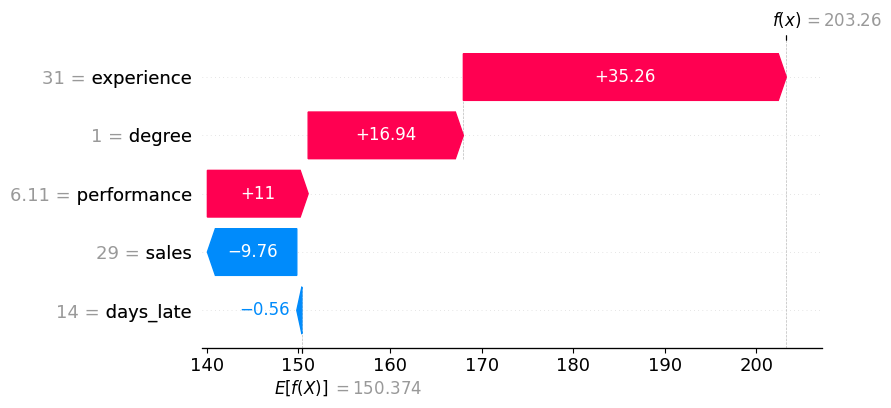

In [6]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

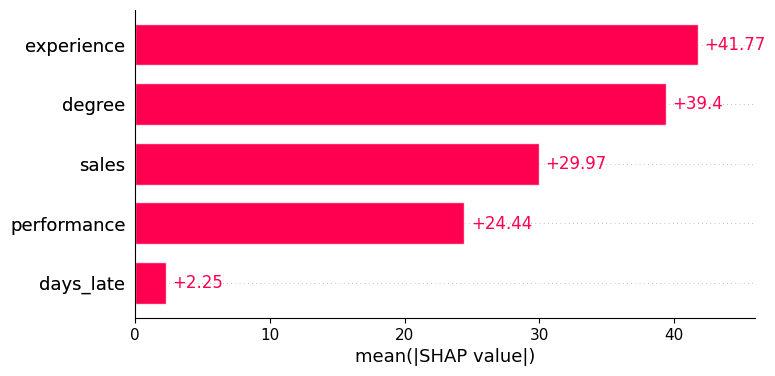

In [7]:
# Which features do NOT have a significant relationship with bonus?
# Answer: days_late
shap.plots.bar(shap_values)

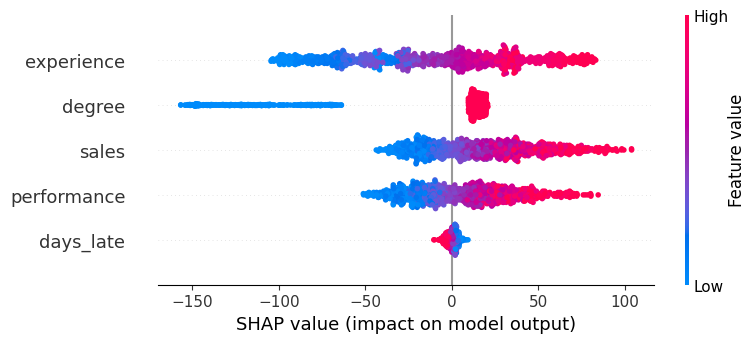

In [8]:
#What tends to happens to an employee's bonus as they gain more experience? 
# Answer: their bonus increases
# You could have also used a dependency plot
shap.plots.beeswarm(shap_values)

## SHAP interaction values

In [9]:
#Get SHAP interaction values
explainer = shap.Explainer(model)
shap_interaction = explainer.shap_interaction_values(X)

In [ ]:
# Are there any potential interactions in the dataset? 
# Answer: yes - experience.degree & performance.sales

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'experience'),
  Text(0, 1.5, 'degree'),
  Text(0, 2.5, 'performance'),
  Text(0, 3.5, 'sales'),
  Text(0, 4.5, 'days_late')])

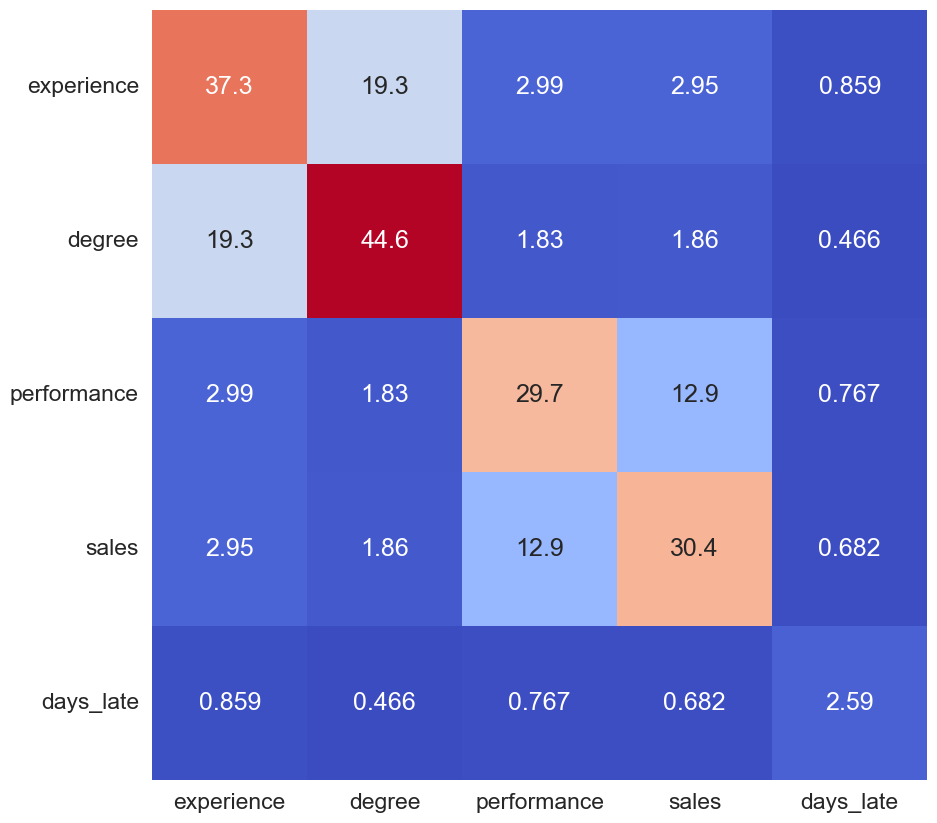

In [10]:
# Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 

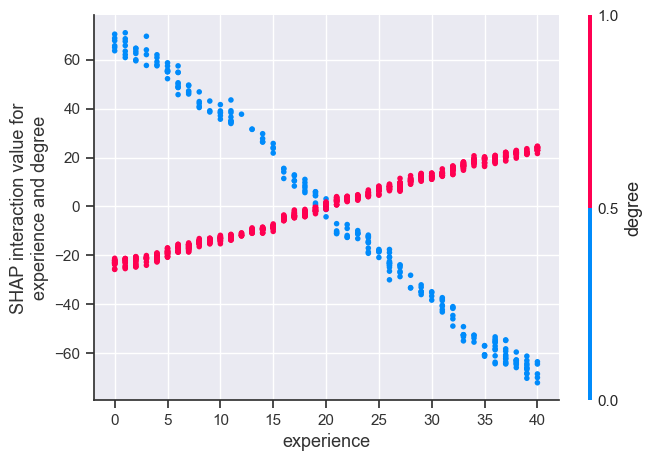

In [11]:
# Experience-degree depenence plot
shap.dependence_plot(
    ("experience", "degree"),
    shap_interaction, X,
    display_features=X)

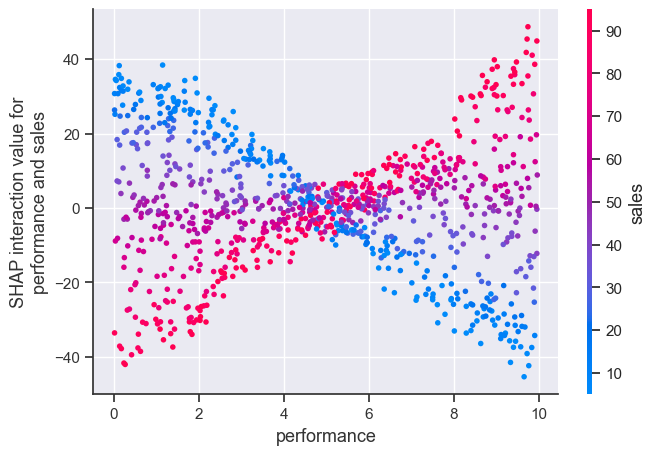

In [12]:
# Performance-sales depenence plot
shap.dependence_plot(
    ("performance", "sales"),
    shap_interaction, X,
    display_features=X)